In [8]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


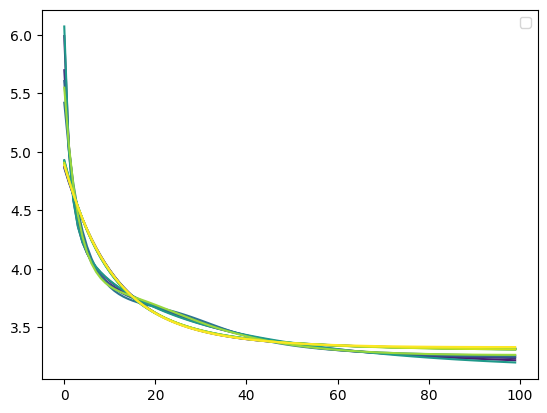

In [9]:
base_dir = Path("../data_out/finn_different_seeds")

fig, ax = plt.subplots()

lines = []
df = {"retardation_file_paths": []}
for d in base_dir.iterdir():
    try:
        path = d / "predicted_retardations/retPred_100.npy"
        # print(path)
        ret = np.load(path)
    except FileNotFoundError:
        # print(f"File not found: {d}")
        continue
    # Continue if any NaNs or Infs are found
    if np.any(np.isnan(ret)) or np.any(np.isinf(ret)):
        continue
    if np.any(ret > 100):
        continue

    df["retardation_file_paths"].append(path)
    lines.append(ax.plot(ret, "-"))
    # ax.plot(ret, label=d.name)

df = pd.DataFrame.from_dict(df)
df.to_csv("../data_out/different_seeds_ret_files.csv")



colormap = cm.viridis
colors = colormap(np.linspace(0, 1, len(lines)))
for line, color in zip(lines, colors):
    line[0].set_color(color)

plt.legend()
plt.show()